# 🔬Analyzing Consumer Preferences for Beverage Types Across Age Groups using Chi-Square Test

## 🎯 Project Motive

The goal of this project is to investigate whether age influences beverage preference. As businesses tailor marketing strategies, understanding if preferences differ significantly by age can be key to product targeting.

- We will explore whether the association between categorical variables (age group and preferred beverage) is statistically significant, using the Chi-Square Test of Independence.

## ❓ Core Research Questions

**1.** Is there a significant relationship between age group and beverage preference?

**2.** Which age groups show higher/lower preference for specific beverage types?

**3.** Can the results inform targeted marketing strategies?



## 📊 Categorical Variables

- **Age Group (5 categories):**

  - `Under 18`

  - `18–25`

  - `26–35`

  - `36–50`

  - `50+`

- **Beverage Preference (4 categories):**

  - `Tea`

  - `Coffee`

  - `Juice`

  - `Soft Drinks`

  - `Cold Coffeee`

## 🧪 Methodology

**1. Data Collection** – We will use survey data or (generate synthetic data).

**2. Data Preprocessing** – We will Convert categorical text into counts using a contingency table.

**3. Apply Chi-Square Test of Independence.**

**4. Analyze P-value** to determine statistical significance.

**5. Interpret Results** for business or academic implications.



## 💻 Technologies and Libraries Used

- **Python:** Programming language used for data manipulation and analysis.

- **Pandas:** For data handling, creating contingency tables, and data cleaning.

- **NumPy:** For data generation (if synthetic data is created).

- **SciPy:** Provides the Chi-Square test functionality.

- **Matplotlib & Seaborn:** For data visualization, including heatmaps and bar charts to interpret the results visually.

## Data Collection

In [50]:
import pandas as pd

data = pd.read_csv('C:/Github Repository/Analyzing-Consumer-Preferences-for-Beverage-Types-Across-Age-Groups-using-Chi-Square-Test/data/age_group_beverage_preference.csv')

### Data Summary

**Total Rows:** `500`

**Total Columns:** `2`

**Age_Group:** Categorical variable representing the age group of the individual.

**Beverage_Preference:** Categorical variable representing the beverage preferred by the individual.

### Sample Data

In [51]:
data.head()

,Age_Group,Beverage_Preference
0,36–50,Soft Drinks
1,50+,Tea
2,26–35,Cold Coffee
3,50+,Juice
4,50+,Juice


## Data Visualization

### Beverage Preferences By Age Group

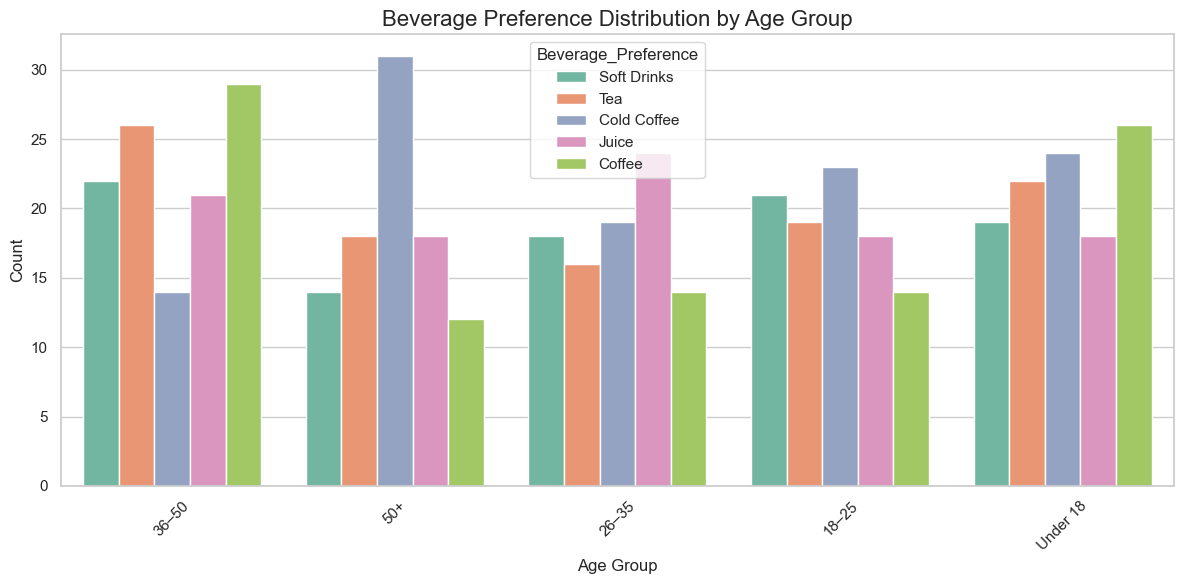

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Age_Group', hue='Beverage_Preference', palette="Set2")
plt.title('Beverage Preference Distribution by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Beverage Preference distribution (without age group)

C:\Users\NIHAL\AppData\Local\Temp\ipykernel_13900\3961860426.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Beverage_Preference', palette="Set1")


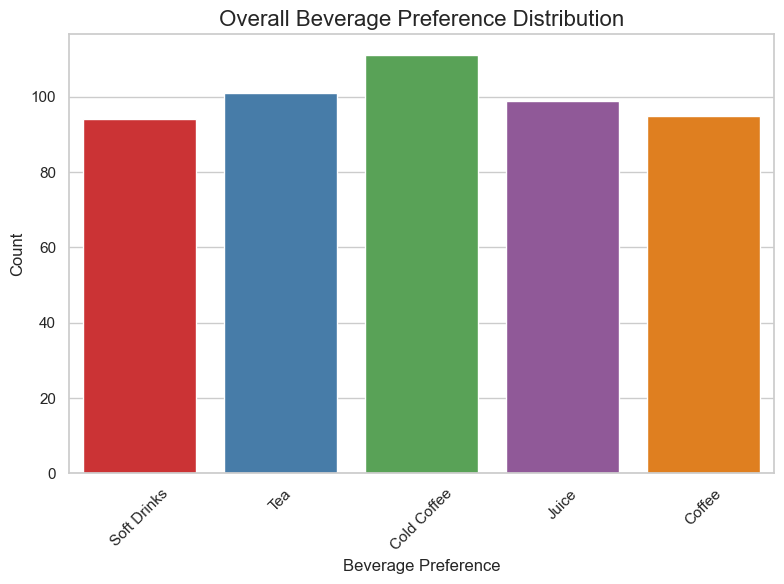

In [72]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Beverage_Preference', palette="Set1")
plt.title('Overall Beverage Preference Distribution', fontsize=16)
plt.xlabel('Beverage Preference', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Proportion of Beverage Preference by Age Group

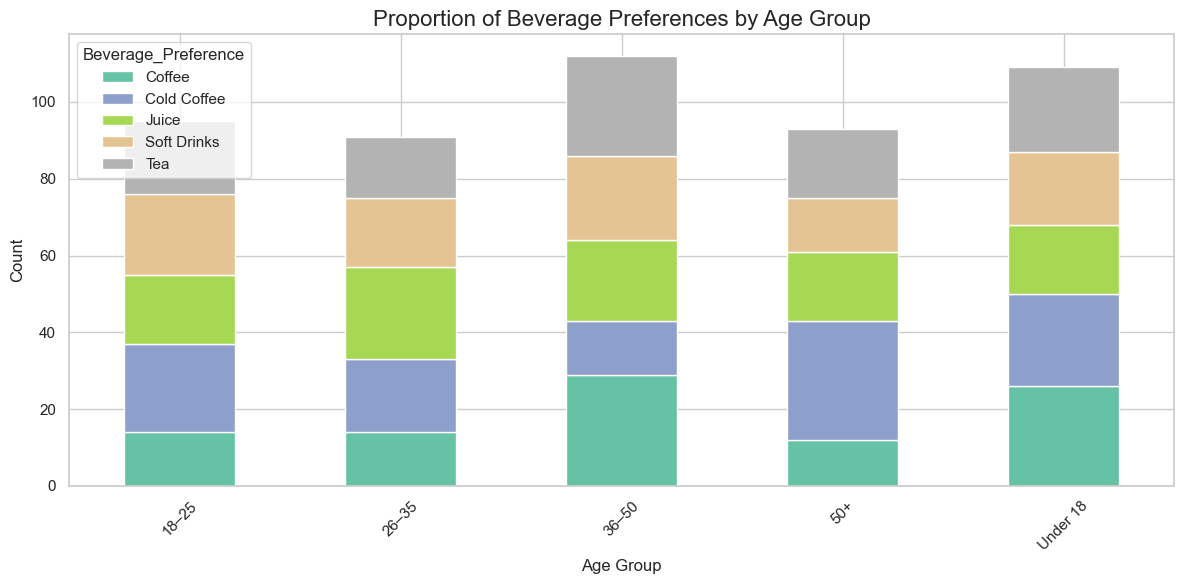

In [73]:
beverage_counts = data.groupby(['Age_Group', 'Beverage_Preference']).size().unstack(fill_value=0)
beverage_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="Set2")
plt.title('Proportion of Beverage Preferences by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Heatmap of Beverage Preferences by Age Group

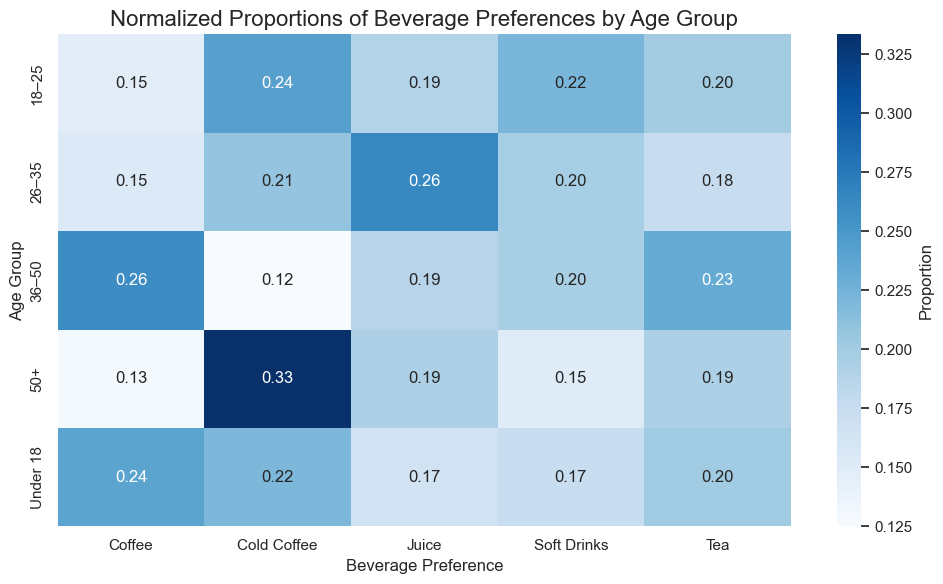

In [74]:
beverage_counts_normalized = beverage_counts.div(beverage_counts.sum(axis=1), axis=0)
plt.figure(figsize=(10, 6))
sns.heatmap(beverage_counts_normalized, annot=True, cmap="Blues", fmt=".2f", cbar_kws={'label': 'Proportion'})
plt.title('Normalized Proportions of Beverage Preferences by Age Group', fontsize=16)
plt.xlabel('Beverage Preference', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.tight_layout()
plt.show()

## Data Preprocessing

In [52]:
data_crosstab = pd.crosstab(data['Age_Group'], data['Beverage_Preference'])
data_crosstab

Beverage_Preference,Coffee,Cold Coffee,Juice,Soft Drinks,Tea
Age_Group,,,,,
18–25,14,23,18,21,19
26–35,14,19,24,18,16
36–50,29,14,21,22,26
50+,12,31,18,14,18
Under 18,26,24,18,19,22


In [53]:
sorter = ["Coffee", "Tea", "Juice", "Soft Drinks", "Cold Coffee"]
sorter2 = ["Under 18", "18–25", "26–35", "36–50", "50+"]

data_crosstab = data_crosstab.loc[sorter2]
data_crosstab = data_crosstab[sorter]
data_crosstab

Beverage_Preference,Coffee,Tea,Juice,Soft Drinks,Cold Coffee
Age_Group,,,,,
Under 18,26,22,18,19,24
18–25,14,19,18,21,23
26–35,14,16,24,18,19
36–50,29,26,21,22,14
50+,12,18,18,14,31


In [59]:
data_crosstab.style.background_gradient(cmap='Reds',vmin=0,vmax=50)

Beverage_Preference,Coffee,Tea,Juice,Soft Drinks,Cold Coffee
Age_Group,,,,,
Under 18,26,22,18,19,24
18–25,14,19,18,21,23
26–35,14,16,24,18,19
36–50,29,26,21,22,14
50+,12,18,18,14,31


### Contingency Table

In [55]:
data_proportions = pd.crosstab(data['Age_Group'], data['Beverage_Preference'], normalize=True)

data_proportions = data_proportions.loc[sorter2]
data_proportions = data_proportions[sorter]

data_proportions.style.background_gradient(cmap='Greens',vmin=0,vmax=0.1)

Beverage_Preference,Coffee,Tea,Juice,Soft Drinks,Cold Coffee
Age_Group,,,,,
Under 18,0.052000,0.044000,0.036000,0.038000,0.048000
18–25,0.028000,0.038000,0.036000,0.042000,0.046000
26–35,0.028000,0.032000,0.048000,0.036000,0.038000
36–50,0.058000,0.052000,0.042000,0.044000,0.028000
50+,0.024000,0.036000,0.036000,0.028000,0.062000


## Setting up the Hypothesis

- **H₀ (Null Hypothesis):** There is no significant relationship between age group and beverage preference. In other words, age group does not affect the likelihood of choosing a specific beverage.

- **H₁ (Alternative Hypothesis):** There is a significant relationship between age group and beverage preference. In other words, the age group influences the likelihood of choosing a specific beverage.

- The significance level (α) is set to 0.05.

- The Chi-Square Test of Independence will be conducted to assess whether the variables "age group" and "beverage preference" are independent or if they are significantly associated with each other.


## Appling Chi-Square Test of Independence

In [56]:
from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(data_crosstab)

## Analyzing P-value

In [60]:
print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)
print("Expected:", expected)

Chi-Square Statistic: 22.669699188207172
Degrees of Freedom: 16
P-value: 0.12285354296896349
Expected: [[20.71  22.018 21.582 20.492 24.198]
 [18.05  19.19  18.81  17.86  21.09 ]
 [17.29  18.382 18.018 17.108 20.202]
 [21.28  22.624 22.176 21.056 24.864]
 [17.67  18.786 18.414 17.484 20.646]]


## Interpret Results

In [58]:
if p < 0.05:
    print("Reject the null hypothesis: Age group and beverage preference are dependent.")
else:
    print("Fail to reject the null hypothesis: No significant relationship.")

Fail to reject the null hypothesis: No significant relationship.


**Decision:**
Since the P-value (0.122) is greater than 0.05, we fail to reject the null hypothesis.

**Conclusion:**
There is no significant relationship between age group and beverage preference. This means that the observed differences in beverage preferences across age groups can be attributed to random variation, rather than being caused by a significant relationship between the two variables.

**Business Insight:**
Based on this result, businesses may conclude that age group does not have a strong influence on beverage preferences, and thus, marketing strategies targeting specific age groups for different beverages may not yield significant benefits.